----

<h1 style="text-align:center;">Instacart Purchase Behavior Analysis</h1>

## Approach

The first thing I'm going to do is download all CSV files and inspect them to see whether they use commas or other character separators, check for extra spaces between the words, and verify whether the files contain column headers. After load the files I'll use the info() method to check the total numbers of rows and columns, identify any missing values, and inspect the data type of each column. Aditionally I'll verify that the column names follow a consistent and convinient format, such as being lowercase and free of spaces.

### 1. Dataset initialization and exploratory review

#### 1.1. Library imports

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

#### 1.2. Data loading

In [2]:
df_instacart_orders = pd.read_csv('datasets/instacart_orders.csv', sep = ';')
df_products = pd.read_csv('datasets/products.csv', sep = ';')
df_aisles = pd.read_csv('datasets/aisles.csv', sep = ';')
df_departments = pd.read_csv('datasets/departments.csv', sep = ';')
df_order_products = pd.read_csv('datasets/order_products.csv', sep = ';')

#### 1.3. Data structure overview

In [3]:
df_instacart_orders.info()
print(df_instacart_orders.head())
print(df_instacart_orders.columns)

<class 'pandas.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB
   order_id  user_id  order_number  order_dow  order_hour_of_day  \
0   1515936   183418            11          6                 13   
1   1690866   163593             5          5                 12   
2   1454967    39980             4          5                 19   
3   1768857    82516            56          0                 20   
4   3007858   196724             2          4                 12   

   days_s

In [4]:
df_products.info()
print(df_products.head(10))
print(df_products.columns)

<class 'pandas.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   product_id     49694 non-null  int64
 1   product_name   48436 non-null  str  
 2   aisle_id       49694 non-null  int64
 3   department_id  49694 non-null  int64
dtypes: int64(3), str(1)
memory usage: 1.5 MB
   product_id                                       product_name  aisle_id  \
0           1                         Chocolate Sandwich Cookies        61   
1           2                                   All-Seasons Salt       104   
2           3               Robust Golden Unsweetened Oolong Tea        94   
3           4  Smart Ones Classic Favorites Mini Rigatoni Wit...        38   
4           5                          Green Chile Anytime Sauce         5   
5           6                                       Dry Nose Oil        11   
6           7                     Pure Coconut Water With O

In [5]:
df_aisles.info()
print(df_aisles.head())
print(df_aisles.columns)

<class 'pandas.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   aisle_id  134 non-null    int64
 1   aisle     134 non-null    str  
dtypes: int64(1), str(1)
memory usage: 2.2 KB
   aisle_id                       aisle
0         1       prepared soups salads
1         2           specialty cheeses
2         3         energy granola bars
3         4               instant foods
4         5  marinades meat preparation
Index(['aisle_id', 'aisle'], dtype='str')


In [6]:
df_departments.info()
print()
print(df_departments.head())
print(df_departments.columns)

<class 'pandas.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   department_id  21 non-null     int64
 1   department     21 non-null     str  
dtypes: int64(1), str(1)
memory usage: 468.0 bytes

   department_id department
0              1     frozen
1              2      other
2              3     bakery
3              4    produce
4              5    alcohol
Index(['department_id', 'department'], dtype='str')


In [7]:
df_order_products.info(show_counts=True)
print()
print(df_order_products.head())
print(df_order_products.columns)

<class 'pandas.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB

   order_id  product_id  add_to_cart_order  reordered
0   2141543       11440               17.0          0
1    567889        1560                1.0          1
2   2261212       26683                1.0          1
3    491251        8670               35.0          1
4   2571142        1940                5.0          1
Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered'], dtype='str')


#### Key findings 

The datasets present structural and data quality considerations that must be addressed prior to analysis.

In the instacart_orders DataFrame, missing values are observed in days_since_prior_order. Although stored as float64, this variable represents a count of days and is conceptually discrete, making an integer format more appropriate after handling null values. Identifier fields such as order_id and user_id, along with order_dow, function as categorical keys rather than quantitative measures; therefore, arithmetic operations are not meaningful and these variables are better treated as categorical types.

In the products DataFrame, missing values appear in product_name. While the dataset is primarily categorical in nature, several identifier columns are stored as int64, indicating the need for type standardization to reflect their non-numeric analytical role.

The aisles and departments DataFrames are categorical reference tables. In both cases, identifier columns are stored as integers but function as labels, supporting conversion to categorical types for consistency across relational joins.

Finally, the order_products DataFrame combines transactional and positional information. The add_to_cart_order variable captures the sequence in which products were added and should be stored as an integer after resolving missing values. The remaining columns serve as categorical identifiers and require consistent data types before aggregation and behavioral analysis.

### 2. Preprocess the data

Duplicate records will be identified and evaluated to determine whether they represent true redundancy or valid repeated observations. Fully redundant entries will be removed, while structurally meaningful repetitions will be retained.

Missing values will be examined to understand their origin and contextual meaning. Depending on their impact, they will either be removed, imputed with clearly interpretable values, or preserved when their absence does not introduce bias into subsequent statistical calculations.

Finally, data types will be reviewed and corrected to reflect the analytical role of each variable, distinguishing between categorical identifiers and quantitative measures to ensure consistency across aggregation and modeling steps.

#### 2.1. Identify and remove duplicate records

##### 2.1.1. `orders` data frame

In [8]:
print(df_instacart_orders.duplicated().sum())
print(df_instacart_orders[df_instacart_orders.duplicated()])

15
        order_id  user_id  order_number  order_dow  order_hour_of_day  \
145574    794638    50898            24          3                  2   
223105   2160484   107525            16          3                  2   
230807   1918001   188546            14          3                  2   
266232   1782114   106752             1          3                  2   
273805   1112182   202304            84          3                  2   
284038   2845099    31189            11          3                  2   
311713   1021560    53767             3          3                  2   
321100    408114    68324             4          3                  2   
323900   1919531   191501            32          3                  2   
345917   2232988    82565             1          3                  2   
371905    391768    57671            19          3                  2   
394347    467134    63189            21          3                  2   
411408   1286742   183220            48         

Duplicated rows share the same order_dow and order_hour_of_day values.

In [9]:
print(df_instacart_orders[(df_instacart_orders['order_hour_of_day'] == 2) & (df_instacart_orders['order_dow'] == 3)].sort_values('order_number',ascending = True))

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
187623   2665629    62212             1          3                  2   
200059   1782114   106752             1          3                  2   
266232   1782114   106752             1          3                  2   
359625    332561   201301             1          3                  2   
324868   2232988    82565             1          3                  2   
...          ...      ...           ...        ...                ...   
109466    851025   168387            54          3                  2   
468324    222962    54979            59          3                  2   
273805   1112182   202304            84          3                  2   
164581   1112182   202304            84          3                  2   
255538    577527     5253            96          3                  2   

        days_since_prior_order  
187623                     NaN  
200059                     NaN  
266232                  

The result suggest that the orders on Wednesday at 2:00 a.m. are being duplicated.

In [10]:
df_instacart_orders.drop_duplicates(inplace=True)

In [11]:
print(df_instacart_orders.duplicated().sum())

0


In [12]:
print(df_instacart_orders['order_id'].duplicated().sum())

0


All duplicated orders occur on Wednesday at 2:00 a.m., suggesting a potential system error; therefore, they were removed.

##### 2.1.2. `products` data frame

In [13]:
print(df_products.duplicated().sum())

0


In [14]:
print(df_products['product_id'].duplicated().sum())

0


In [15]:
print(df_products['product_name'].str.upper().duplicated().sum())

1361


In [16]:
print(df_products['product_name'].dropna().str.upper().duplicated().sum())

104


Duplicated entries appear in product_name due to letter-case differences. They were retained because no duplicate rows exist when product_name and product_id are evaluated jointly after standardization. Keeping them preserves products with distinct IDs that share the same name for accurate counting in later analysis.

##### 2.1.3. `departments` data frame

In [17]:
print(df_departments.duplicated().sum())

0


In [18]:
print(df_departments['department_id'].duplicated().sum())

0


There are no duplicated values, so no action was taken.

##### 2.1.4. `aisles` data frame

In [19]:
print(df_aisles.duplicated().sum())

0


In [20]:
print(df_aisles['aisle_id'].duplicated().sum())

0


There are no duplicated values, so no action was taken.

##### 2.1.5. `order_products` data frame

In [21]:
print(df_order_products.duplicated().sum())

0


In [22]:
print(df_order_products['order_id'].dropna().duplicated().sum())
print()
print(df_order_products['product_id'].duplicated().sum())

4094961

4499434


There are duplicated order_id and product_id values, but since each row represents an item within an order, the same order can appear multiple times and a single order can contain multiple products. As we verified that there are no fully duplicated rows, no rows were removed in this case.

#### 2.2. Detect and handle missing values

##### 2.2.1 `products` data frame

In [23]:
print(df_products[df_products['product_name'].isna()])

       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]


It seems that all missing values are in asile 100 and department 21.

In [24]:
print(df_products['aisle_id'][(df_products['product_name'].isna()) & (df_products['aisle_id'] == 100)])

37       100
71       100
109      100
296      100
416      100
        ... 
49552    100
49574    100
49640    100
49663    100
49668    100
Name: aisle_id, Length: 1258, dtype: int64


We confirm that all missing values are associated with aisle_id 100, as the total number of missing cases, 1,258, matches the number of records where aisle_id equals 100.

In [25]:
print(df_products['department_id'][(df_products['product_name'].isna()) & (df_products['department_id'] == 21)])

37       21
71       21
109      21
296      21
416      21
         ..
49552    21
49574    21
49640    21
49663    21
49668    21
Name: department_id, Length: 1258, dtype: int64


All missing values are associated with department_id 21, as the total number of missing cases, 1,258, matches the count of records with that identifier.

In [26]:
print(df_aisles[df_aisles['aisle_id'] == 100])
print()
print(df_departments[df_departments['department_id'] == 21])

    aisle_id    aisle
99       100  missing

    department_id department
20             21    missing


The aisle name for aisle_id 100 is missing, and the same applies to the department name for department_id 21.

In [27]:
df_products['product_name'] = df_products['product_name'].fillna('Unknown')
print(df_products.isna().sum())

product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64


Products with aisle_id 100 and department_id 21 were classified as Unknown because their category names are missing.

##### 2.2.2 `orders` data frame

In [28]:
print(df_instacart_orders.isna().sum())

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64


In [29]:
print(df_instacart_orders[(df_instacart_orders['days_since_prior_order'].isna()) & (~df_instacart_orders['order_number'] == 1)])
print(len(df_instacart_orders[df_instacart_orders['days_since_prior_order'] == 0]))

Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []
9589


All missing values in days_since_prior_order correspond to first orders, as this variable is only defined after at least two purchases. They were left unchanged because assigning a value such as zero would distort the analysis, given that zero is a valid interval for some orders.

##### 2.2.3. `order_products` data frame

In [30]:
print(df_order_products.isna().sum())

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64


In [31]:
add_to_cart_min = df_order_products['add_to_cart_order'].min()
add_to_cart_max = df_order_products['add_to_cart_order'].max()
print(f"The min value is: {add_to_cart_min}, and the max value is: {add_to_cart_max}")


The min value is: 1.0, and the max value is: 64.0


The variable records items added to the cart from position 1 through 64; items beyond this threshold are not counted.

In [32]:
df_missing_add_to_cart = df_order_products[df_order_products['add_to_cart_order'].isna()]['order_id']
print(len(df_missing_add_to_cart))


836


In [33]:
id_grouped = df_order_products[df_order_products['order_id'].isin(df_missing_add_to_cart)].groupby('order_id')['product_id'].count()

print(id_grouped.min())

65


All orders with missing values contain more than 64 items, while add_to_cart_order is capped at 64.

In [34]:
df_order_products['add_to_cart_order'] = df_order_products['add_to_cart_order'].fillna(999)
df_order_products['add_to_cart_order'] = df_order_products['add_to_cart_order'].astype('int64')
print(df_order_products.isna().sum())
df_order_products.info()

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64
<class 'pandas.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 138.7 MB


Items added to the cart from the 65th position onward are not recorded. To distinguish these cases from valid add_to_cart_order values, they were labeled as 999.

##### Summary of preprocessing findings

Duplicated orders recorded at the same date and time were treated as system-related and removed. Product_name duplicates caused by letter-case differences were preserved after standardization, as identical names linked to different product_id values may require separate treatment in counts. Repeated order_id and product_id combinations were retained because each row represents a product within an order, and no fully duplicated records were identified.

Missing values were addressed according to their analytical meaning. Null values in days_since_prior_order correspond exclusively to first orders and were left unchanged to avoid conflating them with valid zero-day intervals. Items added to the cart beyond position 64 are not recorded; these cases were labeled as 999 in add_to_cart_order to distinguish unrecorded positions from valid sequence values.

### 3. Perform data analysis

#### 3.1. validate value ranges

In [35]:
print(df_instacart_orders['order_dow'].min())
print(df_instacart_orders['order_dow'].max())

0
6


In [36]:
print(df_instacart_orders['order_hour_of_day'].min())
print(df_instacart_orders['order_hour_of_day'].max())

0
23


The values fall within expected ranges: order_dow spans from 0 to 6, and order_hour_of_day ranges from 0 to 23.

#### 3.2. Count orders by hour of day

32894


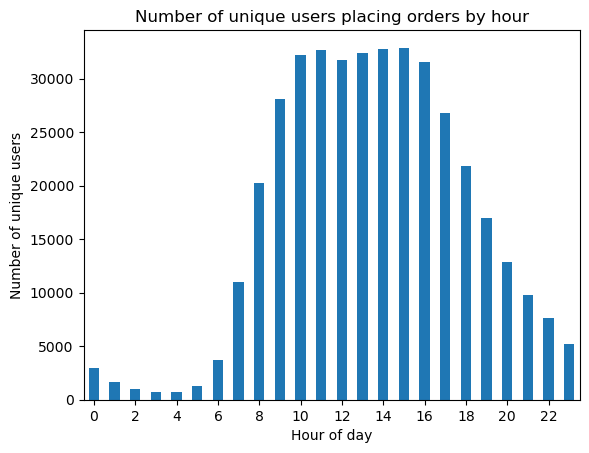

In [37]:

num_of_orders_p_hour = df_instacart_orders.groupby('order_hour_of_day')['user_id'].nunique().sort_index()
print(num_of_orders_p_hour.max())
ax = num_of_orders_p_hour.plot(kind = 'bar', xlabel='Hour of day',
                         ylabel='Number of unique users', title = 'Number of unique users placing orders by hour', rot = 0)
ax.set_xticks(ax.get_xticks()[::2]) 

Order activity increases from early morning, peaks between 10:00 and 16:00, and declines toward the night, with minimal activity between 0:00 and 5:00. The highest number of users occurs at 15:00, with 32,894 users.

#### 3.3. Analyze orders by day of week

order_dow
0    57661
1    56479
2    48587
3    45331
4    44281
5    46127
6    45604
Name: user_id, dtype: int64
49152.857142857145


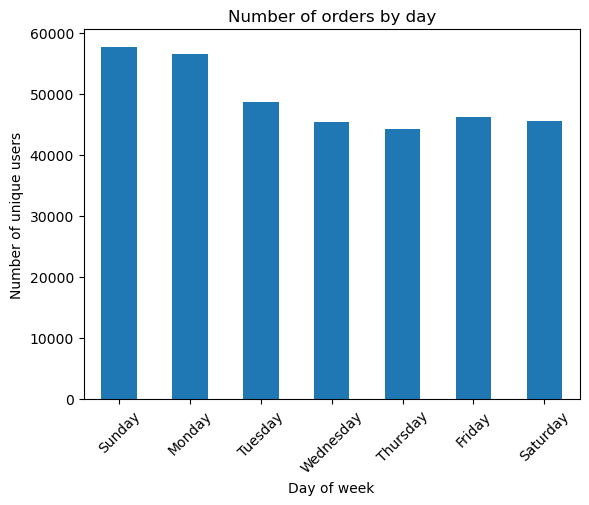

In [38]:
num_of_users__ordering_p_day = df_instacart_orders.groupby('order_dow')['user_id'].nunique().sort_index()
print(num_of_users__ordering_p_day)
print(num_of_users__ordering_p_day.mean())
num_of_users__ordering_p_day.index= ['Sunday', 'Monday', 'Tuesday',
                            'Wednesday', 'Thursday', 'Friday', 'Saturday']
num_of_users__ordering_p_day.plot(kind = 'bar', xlabel='Day of week',
                         ylabel='Number of unique users', title = 'Number of orders by day', rot=45)
plt.show()

Order activity peaks on Sunday and Monday, with 57,661 and 56,479 users, and reaches its lowest levels on Wednesday and Thursday, with 45,331 and 44,281 users. The mean number of users per day is 49,153.

#### 3.4. Analyze time between orders

In [39]:
print(df_instacart_orders['days_since_prior_order'].min())
print(df_instacart_orders['days_since_prior_order'].max())
print(df_instacart_orders['days_since_prior_order'].mean())

0.0
30.0
11.101813900274362


days_since_prior_order
0.0      7532
1.0     13286
2.0     17552
3.0     20426
4.0     22347
5.0     23330
6.0     26812
7.0     32021
8.0     21772
9.0     15354
10.0    12412
11.0    10847
12.0    10177
13.0    11172
14.0    13080
15.0     9044
16.0     6411
17.0     5368
18.0     4896
19.0     4835
20.0     5187
21.0     6276
22.0     4439
23.0     3285
24.0     2974
25.0     2690
26.0     2620
27.0     2961
28.0     3684
29.0     2647
30.0    44444
Name: user_id, dtype: int64


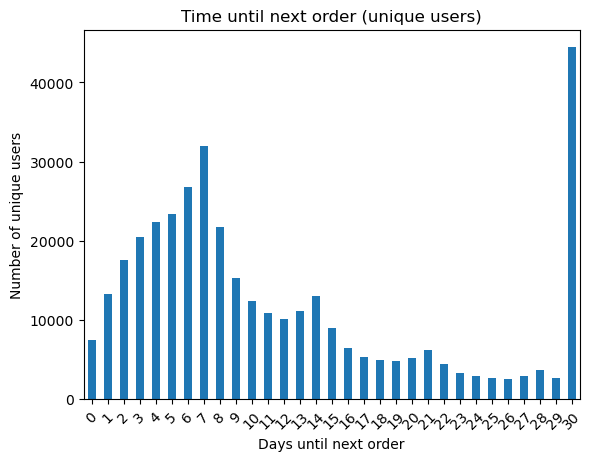

In [40]:
time_since_prior_order = df_instacart_orders.groupby('days_since_prior_order')['user_id'].nunique().sort_index()
print(time_since_prior_order)

time_since_prior_order.index= range(0,31)
time_since_prior_order.plot(kind = 'bar', xlabel='Days until next order',
                         ylabel='Number of unique users', title = 'Time until next order (unique users)', rot=45)
plt.show()

Reorder intervals range from 0 to 30 days. The distribution shows two peaks, one at 7 days with 32,021 users and a stronger peak at 30 days with 44,444 users, indicating weekly and monthly reorder cycles. The average interval is 11 days.

#### 3.6. Compare hourly order patterns between Wednesday and Saturday

In [41]:
num_of_orders_p_hour_wed = df_instacart_orders[df_instacart_orders['order_dow'] == 3]['order_hour_of_day'].value_counts().sort_index()
num_of_orders_p_hour_sat = df_instacart_orders[df_instacart_orders['order_dow'] == 6]['order_hour_of_day'].value_counts().sort_index()

In [42]:
df_wed_sat = pd.DataFrame({'Wednesday':num_of_orders_p_hour_wed, 'Saturday': num_of_orders_p_hour_sat})

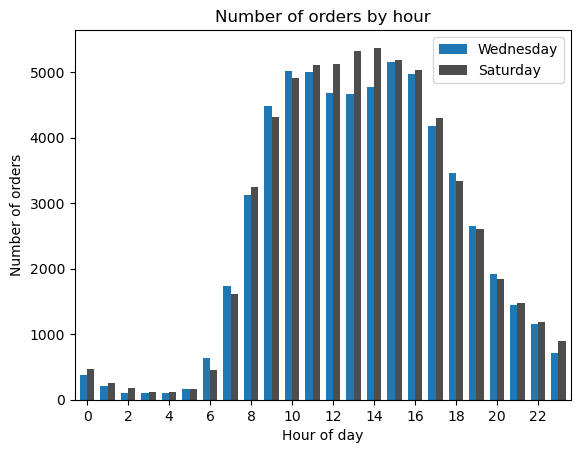

In [43]:
colors = ['#1f77b4', '#4d4d4d']
ax = df_wed_sat.plot(kind = 'bar', xlabel='Hour of day',
                         ylabel='Number of orders', title = 'Number of orders by hour', rot = 0, width = 0.7, color = colors)
ax.set_xticks(ax.get_xticks()[::2]) 
plt.show()

Wednesday and Saturday show similar hourly patterns, with low activity between 0:00 and 5:00, a morning increase, and peaks from late morning to mid-afternoon. Saturday records higher order volumes across most hours, especially between 11:00 and 16:00, where the peak is more pronounced.

#### 3.7 Analyze order distribution per customer

In [44]:
orders_per_client = df_instacart_orders.groupby('user_id')['order_id'].nunique().sort_index()
print(orders_per_client.min())
print(orders_per_client.max())
print(orders_per_client.mean())
print(orders_per_client.median())
print(len(orders_per_client[orders_per_client == 1]))

1
28
3.042181952145938
2.0
55357


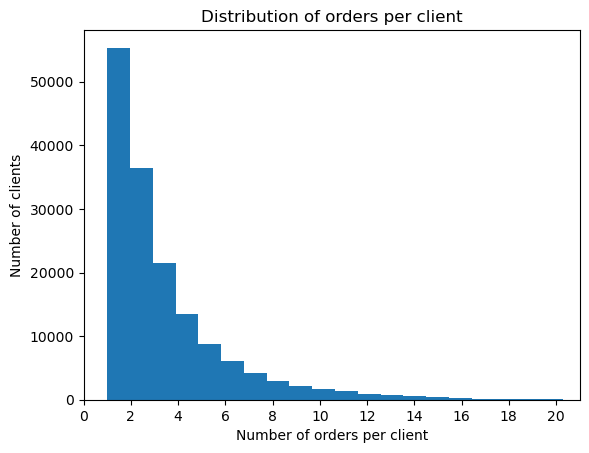

In [45]:
orders_per_client.plot(kind='hist', bins=28)
plt.xlabel('Number of orders per client')
plt.ylabel('Number of clients')
plt.title('Distribution of orders per client')
plt.xlim(0, 21)
plt.xticks(range(0, 21, 2))
plt.show()

Most customers place few orders, and customer counts decline as order frequency increases. The highest frequency occurs at one order with 55,357 customers, followed by two orders with 36,508 and three orders with 21,547. Order counts range from 1 to 28; the histogram is truncated at 21 because higher values are rare. The average is 3 orders, and the median is 2.

#### 3.8. Identify the top 20 most popular products

In [46]:
print(df_order_products['product_id'].value_counts().sort_values(ascending = False).head(20))

product_id
24852    66050
13176    53297
21137    37039
21903    33971
47209    29773
47766    24689
47626    21495
16797    20018
26209    19690
27845    19600
27966    19197
22935    15898
24964    15292
45007    14584
39275    13879
49683    13675
28204    12544
5876     12232
8277     11993
40706    11781
Name: count, dtype: int64


In [47]:
top_products  = df_order_products['product_id'].value_counts().sort_values(ascending = False).head(20).index
top_products_df = pd.DataFrame({'product_id':top_products})

In [48]:
searching_product_name = top_products_df.merge(df_products[['product_id', 'product_name']], on = 'product_id', how = 'left')
searching_product_name.index = range(1,21)
print(searching_product_name)

    product_id              product_name
1        24852                    Banana
2        13176    Bag of Organic Bananas
3        21137      Organic Strawberries
4        21903      Organic Baby Spinach
5        47209      Organic Hass Avocado
6        47766           Organic Avocado
7        47626               Large Lemon
8        16797              Strawberries
9        26209                     Limes
10       27845        Organic Whole Milk
11       27966       Organic Raspberries
12       22935      Organic Yellow Onion
13       24964            Organic Garlic
14       45007          Organic Zucchini
15       39275       Organic Blueberries
16       49683            Cucumber Kirby
17       28204        Organic Fuji Apple
18        5876             Organic Lemon
19        8277  Apple Honeycrisp Organic
20       40706    Organic Grape Tomatoes


In [49]:
duplicated_products = df_products[(df_products['product_name'].str.upper().duplicated(keep = False))& ~(df_products['product_name'] == 'Unknown')].sort_values(by = 'product_name')
duplicated_products_id = duplicated_products['product_id'].tolist()
has_products_with_duplicated_names  = searching_product_name['product_id'].isin(duplicated_products_id).any()
print("Presence of products with duplicated names in the filtered dataset:",
    has_products_with_duplicated_names)

Presence of products with duplicated names in the filtered dataset: False


The list is dominated by fresh produce, with a strong presence of organic items, indicating that frequently purchased products are staple foods rather than processed goods. No duplicated product names appear in the top 20, confirming that name variations do not affect the ranking.

#### 3.9. Analyze number of items per order

In [50]:
df_products['canonical_name'] = df_products['product_name'].str.strip().str.upper()

In [51]:
df_orders = df_order_products.merge(
    df_products[['product_id', 'product_name', 'aisle_id', 'department_id', 'canonical_name']],
    on = 'product_id', how = 'left'
)

In [52]:
items_per_order = df_order_products.groupby('order_id').size()
print("Average number of items per order:", items_per_order.mean())
print("Maximum number of items in a single order:", items_per_order.max())
print("Median number of items per order:", items_per_order.median())

Average number of items per order: 10.098983215049127
Maximum number of items in a single order: 127
Median number of items per order: 8.0


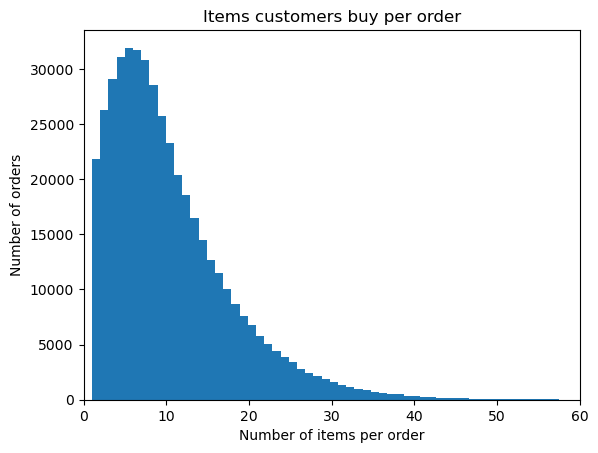

In [53]:
bx = df_order_products.groupby('order_id')['product_id'].count().plot(kind = 'hist', bins = 127, xlabel='Number of items per order',
                       ylabel='Number of orders', title = 'Items customers buy per order')
bx.set_xlim(0, 60)
bx.set_xticks(range(0, 61, 10))

Most orders contain a small number of items. The average is 10 items per order, and the median is 8, indicating that half of the orders include eight items or fewer. Although the maximum reaches 127 items, such cases are rare. Orders above 60 items are infrequent and not visible at the plot scale, so the graph was truncated at that threshold to highlight typical purchasing behavior.

#### 3.10. Identify the top 20 most frequently reordered products

In [54]:
reorders = df_orders[df_orders['reordered']==1]

In [55]:
top_twenty_canonical_reordered_products = (reorders[reorders['canonical_name'] != 'UNKNOWN'].groupby('product_id').size()
    .sort_values(ascending = False).head(20))

In [56]:
top_products_ids = (df_orders.loc[df_orders['product_id'].isin(top_twenty_canonical_reordered_products.index),
    ['product_id', 'product_name']].drop_duplicates().set_index('product_id')
                   .loc[top_twenty_canonical_reordered_products.index].reset_index())
top_products_ids.index = range(1, 21)

In [57]:
print(top_twenty_canonical_reordered_products)
print(top_products_ids)

product_id
24852    55763
13176    44450
21137    28639
21903    26233
47209    23629
47766    18743
27845    16251
47626    15044
27966    14748
16797    13945
26209    13327
22935    11145
24964    10411
45007    10076
49683     9538
28204     8989
8277      8836
39275     8799
5876      8412
49235     8389
dtype: int64
    product_id              product_name
1        24852                    Banana
2        13176    Bag of Organic Bananas
3        21137      Organic Strawberries
4        21903      Organic Baby Spinach
5        47209      Organic Hass Avocado
6        47766           Organic Avocado
7        27845        Organic Whole Milk
8        47626               Large Lemon
9        27966       Organic Raspberries
10       16797              Strawberries
11       26209                     Limes
12       22935      Organic Yellow Onion
13       24964            Organic Garlic
14       45007          Organic Zucchini
15       49683            Cucumber Kirby
16       28204      

In [58]:
print("Presence of products with duplicated names in top products dataset:", top_products_ids['product_id'].isin(duplicated_products_id).any())

Presence of products with duplicated names in top products dataset: False


The 20 most frequently reordered items are primarily fruits, vegetables, and other commonly consumed organic products. The leading items include Banana with 55,763 reorders, Bag of Organic Bananas with 44,450, and Organic Strawberries with 28,639. No duplicated product names appear in the ranking, confirming that name variations do not affect the results.

#### 3.11. calculate reorder rate per product

In [59]:
total_orders = df_order_products.groupby('product_id')['order_id'].count().sort_index()

In [60]:
df_reps = df_order_products[df_order_products['reordered'] == 1]
reps_count = df_reps.groupby('product_id')['reordered'].sum().sort_index()
print(total_orders)
print(reps_count)

product_id
1        280
2         11
3         42
4         49
7          2
        ... 
49690      5
49691     72
49692     12
49693     25
49694      9
Name: order_id, Length: 45573, dtype: int64
product_id
1        158
3         31
4         25
7          1
8          6
        ... 
49690      4
49691     31
49692      5
49693     11
49694      3
Name: reordered, Length: 36228, dtype: int64


In [61]:
rate = reps_count / total_orders
rate = rate.fillna(0).reset_index()
print(rate)

       product_id         0
0               1  0.564286
1               2  0.000000
2               3  0.738095
3               4  0.510204
4               7  0.500000
...           ...       ...
45568       49690  0.800000
45569       49691  0.430556
45570       49692  0.416667
45571       49693  0.440000
45572       49694  0.333333

[45573 rows x 2 columns]


In [62]:
df_rate_with_names = rate.merge(
    df_products[['product_id', 'product_name']], on='product_id', how = 'left'
)
cols_rwn = list(df_rate_with_names.columns)
cols_rwn[1], cols_rwn[2] = cols_rwn[2], cols_rwn[1]
df_rate_with_names = df_rate_with_names[cols_rwn]
df_rate_with_names.columns = ['product_id', 'product_name', 'reorder_rate']

In [63]:
print(df_rate_with_names)

       product_id                                       product_name  \
0               1                         Chocolate Sandwich Cookies   
1               2                                   All-Seasons Salt   
2               3               Robust Golden Unsweetened Oolong Tea   
3               4  Smart Ones Classic Favorites Mini Rigatoni Wit...   
4               7                     Pure Coconut Water With Orange   
...           ...                                                ...   
45568       49690                      HIGH PERFORMANCE ENERGY DRINK   
45569       49691                      ORIGINAL PANCAKE & WAFFLE MIX   
45570       49692    ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR   
45571       49693                             SPRING WATER BODY WASH   
45572       49694                            BURRITO- STEAK & CHEESE   

       reorder_rate  
0          0.564286  
1          0.000000  
2          0.738095  
3          0.510204  
4          0.500000  
...

In [64]:
print("Mean reorder proportion per product:", df_rate_with_names['reorder_rate'].mean())
print("Median reorder proportion per product:", df_rate_with_names['reorder_rate'].median())

Mean reorder proportion per product: 0.38670677893645
Median reorder proportion per product: 0.40816326530612246


On average, products are reordered in 39% of purchases. The median reorder rate is 0.41, indicating that for half of the products, reorders account for about 41% of purchases.

#### 3.12. Calculate reorder rate per customer

In [65]:
df_product_client = df_order_products.merge(df_instacart_orders[['order_id', 'user_id']],on='order_id', how='left')

In [66]:
total_products_per_client = df_product_client.groupby('user_id')['product_id'].count().sort_index()

In [67]:
df_product_client_reordered = df_product_client[df_product_client['reordered'] == 1]

In [68]:
total_reorders_per_client = df_product_client_reordered.groupby('user_id')['product_id'].count().sort_index()

In [69]:
print(total_products_per_client)
print(total_reorders_per_client)

user_id
2          26
4           2
5          12
6           4
7          14
         ... 
206203     27
206206     21
206207     46
206208    125
206209     25
Name: product_id, Length: 149626, dtype: int64
user_id
2          1
5          8
7         13
11         3
12         3
          ..
206203     6
206206    15
206207    41
206208    87
206209     8
Name: product_id, Length: 132991, dtype: int64


In [70]:
reordered_ratio = total_reorders_per_client / total_products_per_client
reordered_ratio = reordered_ratio.fillna(0).sort_index().reset_index()
reordered_ratio.columns = ['user_id', 'reordered_ratio']

In [71]:
print(reordered_ratio)

        user_id  reordered_ratio
0             2         0.038462
1             4         0.000000
2             5         0.666667
3             6         0.000000
4             7         0.928571
...         ...              ...
149621   206203         0.222222
149622   206206         0.714286
149623   206207         0.891304
149624   206208         0.696000
149625   206209         0.320000

[149626 rows x 2 columns]


In [72]:
print(df_product_client[df_product_client['user_id'] == 6][['order_id', 'reordered']])

         order_id  reordered
1956133   2086598          0
1976255   2086598          0
2641445   2086598          0
2960488   2086598          0


In [73]:
print("Mean proportion of reordered products per customer:", reordered_ratio['reordered_ratio'].mean())
print("Median proportion of reordered products per customer:", reordered_ratio['reordered_ratio'].median())

Mean proportion of reordered products per customer: 0.4948531736151642
Median proportion of reordered products per customer: 0.5


The mean reorder proportion per customer is 0.49, and the median is 0.50, indicating that about half of the products purchased by a typical customer had been ordered previously.

#### 3.13. Identify the top 20 first-added products

In [74]:
df_order_prod_and_name = df_order_products.merge(
    df_products[['product_id','product_name', 'canonical_name']], on = 'product_id', how = 'left'
)

In [75]:
df_first_items = df_order_prod_and_name[ (df_order_prod_and_name['add_to_cart_order'] == 1) & (df_order_prod_and_name['canonical_name'] != 'UNKNOWN')]

In [76]:
df_first_items_ordered = df_first_items.groupby('product_id')['order_id'].count().sort_values(ascending = False).reset_index().head(20)
df_first_items_ordered.columns = ['product_id' , 'times_first_added_to_cart']

In [77]:
top_twenty_first_added_products = df_first_items_ordered.merge(
    df_order_prod_and_name[['product_id','product_name']], on = 'product_id', how = 'inner'
)
top_twenty_first_added_products = top_twenty_first_added_products.drop_duplicates()
top_twenty_first_added_products.index = range(1,21)

In [78]:
cols = list(top_twenty_first_added_products.columns)
cols[1], cols[2] = cols[2], cols[1]
top_twenty_first_added_products = top_twenty_first_added_products[cols]

In [79]:
print(top_twenty_first_added_products)

    product_id                 product_name  times_first_added_to_cart
1        24852                       Banana                      15562
2        13176       Bag of Organic Bananas                      11026
3        27845           Organic Whole Milk                       4363
4        21137         Organic Strawberries                       3946
5        47209         Organic Hass Avocado                       3390
6        21903         Organic Baby Spinach                       3336
7        47766              Organic Avocado                       3044
8        19660                 Spring Water                       2336
9        16797                 Strawberries                       2308
10       27966          Organic Raspberries                       2024
11       44632   Sparkling Water Grapefruit                       1914
12       49235          Organic Half & Half                       1797
13       47626                  Large Lemon                       1737
14    

In [80]:
print("Presence of products with duplicated names among the 20 most frequently first-added items:", top_twenty_first_added_products['product_id'].isin(duplicated_products_id).any())

Presence of products with duplicated names among the 20 most frequently first-added items: False


The items most frequently added first to the cart are primarily staple groceries, particularly fruits, dairy products, and beverages. Banana and Bag of Organic Bananas lead by a wide margin, with 15,562 and 11,026 first additions, followed by Organic Whole Milk and Organic Strawberries. These results highlight the products customers most commonly use to begin their orders. No duplicated product names appear in the top 20, confirming that name inconsistencies do not affect the ranking.

### 4. Overall project conclusions

Order, product, and customer data quantify ordering frequency, basket size, and reorder behavior.

Order activity is lowest between 0:00 and 5:00, increases from 6:00 onward, and peaks at 15:00 before declining through the evening. Activity is highest on Sunday and Monday and lowest on Wednesday and Thursday. Reorder intervals range from 0 to 30 days, with peaks at 7 and 30 days and an average of 11 days.

Most customers place between one and three orders, with a mean of three and a median of two. Orders contain an average of 10 items and a median of 8, while large baskets remain uncommon.

At the product level, the mean reorder rate is 0.39 and the median is 0.41. At the customer level, the mean reorder rate is 0.49 and the median is 0.50.

Top purchases, reorders, and first-added items consistently include Banana, Bag of Organic Bananas, Organic Strawberries, and Organic Whole Milk. Product identifiers were validated, and duplicated product names do not affect counts or rankings.